In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataframe = pd.read_csv(r"indicadores_H5W1_wordnet_sentencebert_CLASS.csv")
dataframe

,Who,Where,When,What,Why,How,Additional information,Who_w,Where_w,When_w,What_w,Why_w,How_w,Additional information_w,CLASS
0,0.696783,0.076060,0.000000,0.505262,0.000000,0.170564,0.000000,3.637586,0.000000,0.0,2.564949,0.0,0.0,0.000000,entailment
1,0.762582,0.087866,0.190637,0.944161,0.063499,0.223710,0.699488,3.637586,0.000000,0.0,3.637586,0.0,0.0,3.637586,entailment
2,0.881357,0.265408,0.000000,0.360803,0.000000,0.317074,0.068419,3.637586,2.251292,0.0,2.538974,0.0,0.0,0.000000,contradiction
3,0.153366,0.203428,0.000000,0.358316,0.000000,0.000000,0.000000,2.028148,0.000000,0.0,3.637586,0.0,0.0,0.000000,contradiction
4,0.919903,0.715984,0.000000,0.224679,0.000000,0.000000,0.172891,3.637586,3.637586,0.0,2.251292,0.0,0.0,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.706643,0.210286,0.000000,0.570392,0.000000,0.137777,0.000000,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000,entailment
96,0.894956,0.000000,0.000000,0.830284,0.000000,0.000000,0.000000,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000,entailment
97,0.072305,0.000000,0.000000,0.086890,0.000000,0.189328,0.000000,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000,contradiction
98,0.655674,0.139479,0.000000,0.357685,0.000000,0.000000,0.000000,3.637586,0.000000,0.0,2.564949,0.0,0.0,0.000000,contradiction


In [3]:
dataframe.describe()

,Who,Where,When,What,Why,How,Additional information,Who_w,Where_w,When_w,What_w,Why_w,How_w,Additional information_w
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.649812,0.271093,0.090596,0.405254,0.094444,0.105398,0.130433,3.216180,0.952474,0.083880,2.465364,0.155714,0.248701,0.405521
std,0.285327,0.278851,0.171786,0.290139,0.180641,0.154895,0.192638,0.979224,1.417860,0.492678,1.268416,0.691334,0.747393,1.052825
min,0.000000,0.000000,0.000000,-0.011613,-0.009505,-0.002661,-0.061773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474195,0.086424,0.000000,0.171322,0.000000,0.000000,0.000000,3.637586,0.000000,0.000000,1.871802,0.000000,0.000000,0.000000
50%,0.681552,0.206847,0.000000,0.326847,0.000000,0.041717,0.083760,3.637586,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000
75%,0.896777,0.302398,0.187566,0.635148,0.187566,0.187566,0.187566,3.637586,1.730214,0.000000,3.637586,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.637586,3.637586,3.258097,3.637586,3.637586,3.637586,3.637586


In [4]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


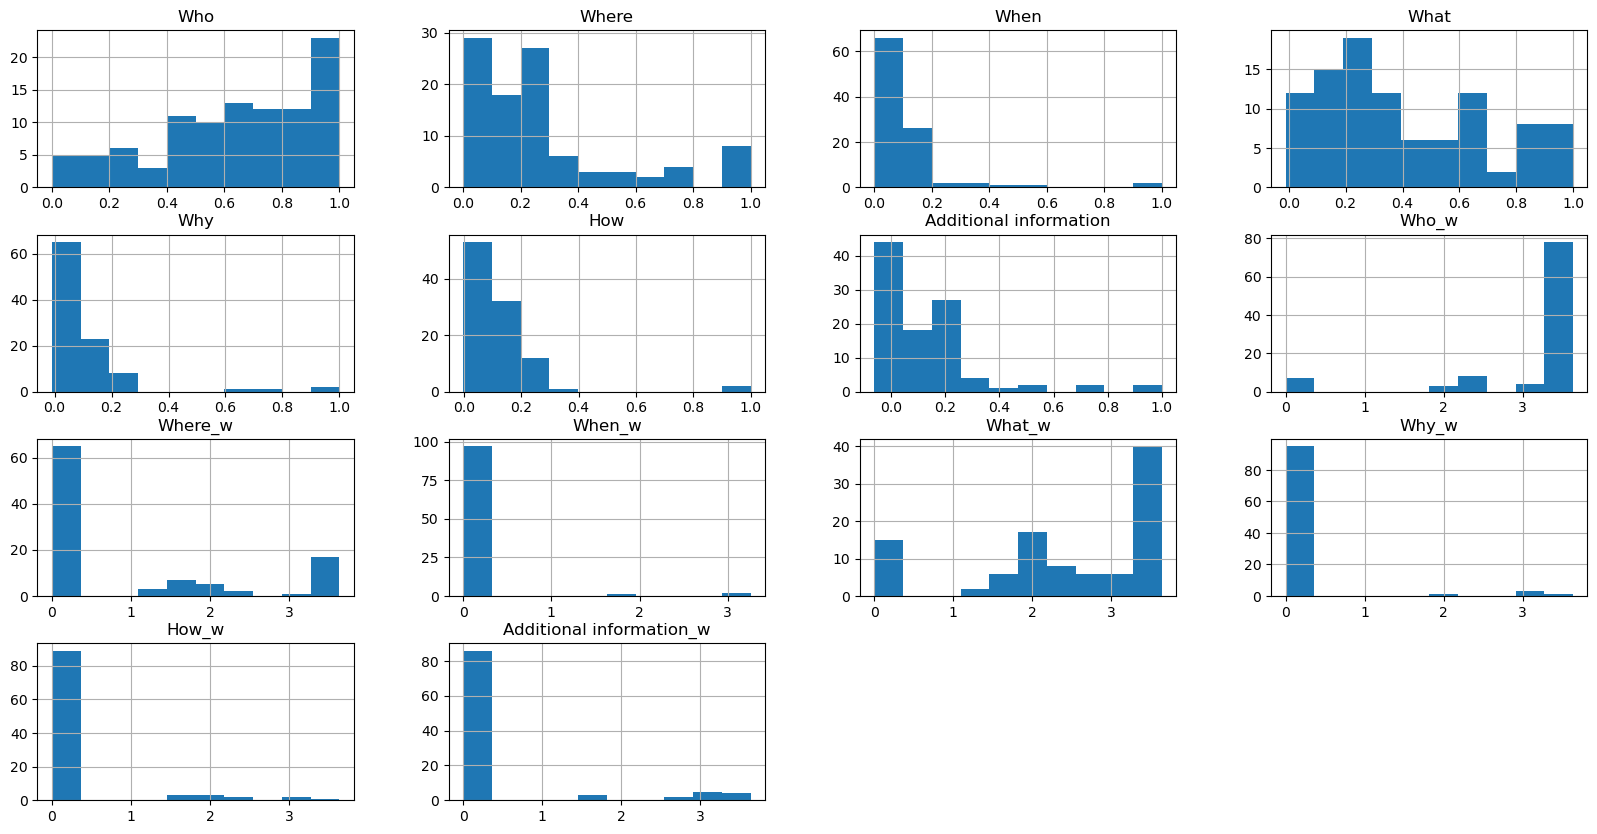

In [5]:
dataframe.hist(figsize=(20,10))
plt.show()

In [6]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=['Who','Where','When','What','Why','How','Additional information'],kind='reg')

In [7]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_19156\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_19156\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 14)

In [8]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [9]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [10]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [11]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
model.decision_function(X)

array([[ 7.74334670e-04,  2.65809086e-01, -2.66583420e-01],
       [-5.79467821e-01,  7.94274637e-01, -2.14806816e-01],
       [-4.03442283e-01,  3.03461120e-01,  9.99811629e-02],
       [ 2.58492136e-01,  3.03102079e-01, -5.61594215e-01],
       [-6.82884113e-01,  3.16726601e-01,  3.66157511e-01],
       [-5.13663371e-01,  3.24144770e-01,  1.89518601e-01],
       [-1.37558814e+00, -4.71507185e-01,  1.84709533e+00],
       [-5.97768610e-01,  2.53352482e-01,  3.44416127e-01],
       [-9.26827867e-01, -7.13233008e-01,  1.64006087e+00],
       [ 9.34307801e-02,  2.59852511e-01, -3.53283292e-01],
       [ 5.67792068e-02,  7.06931643e-02, -1.27472371e-01],
       [ 9.51601201e-02,  2.57272891e-01, -3.52433011e-01],
       [ 7.89287240e-03,  4.31246699e-01, -4.39139571e-01],
       [ 1.55644492e-01, -9.33916771e-02, -6.22528153e-02],
       [-7.02624012e-01,  4.05048551e-01,  2.97575462e-01],
       [-1.00799457e+00,  2.61439481e-01,  7.46555092e-01],
       [-5.54036498e-01,  6.81168382e-01

In [17]:
labels=np.array(['Who','Where','When','What','Why','How','Additional information','Who_w','Where_w','When_w','What_w','Why_w','How_w','Additional information_w'])

In [18]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [20]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [21]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  10 What_w 3 What
Entailment  3 What 11 Why_w
Neutral  11 Why_w 3 What


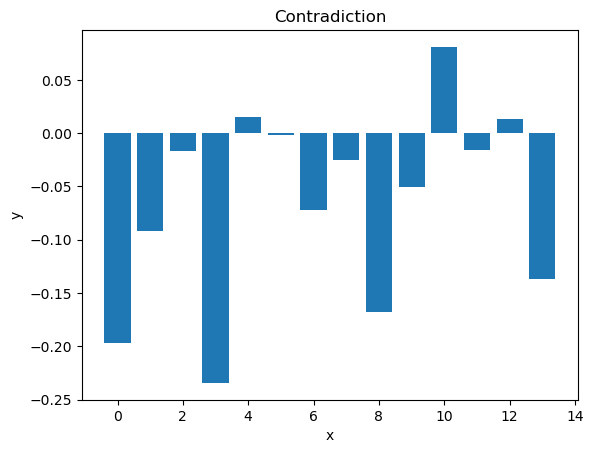

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,14,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

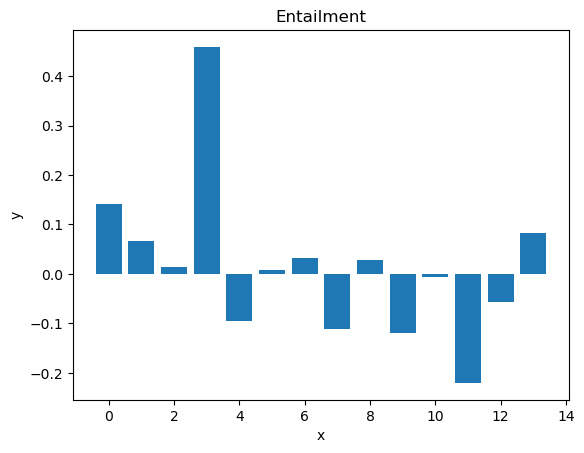

In [24]:
x_v = np.arange(0,14,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

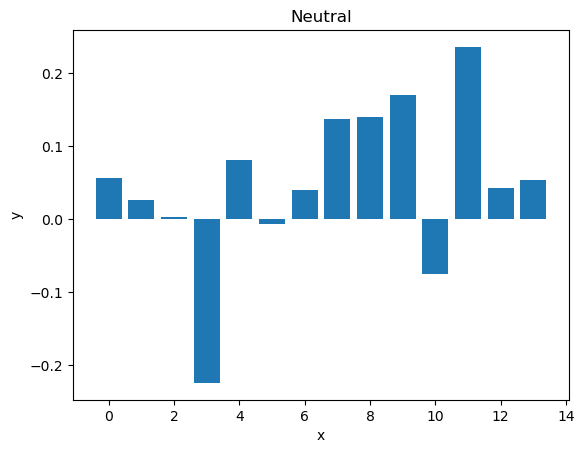

In [25]:
x_v = np.arange(0,14,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [26]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'neutral' 'neutral' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'contradiction' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'contradiction'
 'neutral' 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'neutral' 'contradiction' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'contradiction' 'entailment' 'contradiction' 'contradiction'
 'entailment' 'contradiction' 'entailment' 'entailment' 'enta

In [27]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [28]:
X

array([[0.69678307, 0.07605992, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.76258183, 0.08786619, 0.19063728, ..., 0.        , 0.        ,
        3.63758616],
       [0.88135707, 0.26540822, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07230499, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65567434, 0.13947898, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61532092, 0.23936102, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
model.score(X,y)

0.52

In [30]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [31]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.400000 (0.166296)


In [32]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6


In [39]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [38]:
print(confusion_matrix(Y_validation, predictions,labels=model.classes_))

[[1 2 0]
 [0 4 0]
 [0 2 1]]


In [34]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       1.00      0.33      0.50         3
   entailment       0.50      1.00      0.67         4
      neutral       1.00      0.33      0.50         3

     accuracy                           0.60        10
    macro avg       0.83      0.56      0.56        10
 weighted avg       0.80      0.60      0.57        10

